# Enzyme Kinetics Four Ways for Report

This is an example of the kind of math you will need to do for the assignment.

## Set Up 

The first block of code below loads in all the *Python* code tools needed. *SciPy*, *NumPy* and *MatPlotLib* are part of the *Python* standard library. They are enormous collections of code that have been written by hundreds of dedicated people and made freely available for us to use. 

*Uncertainties* is a common and useful library that provides code for using values that include errors (number $\pm$ standard deviation). It is not part of the standard library (yet) and is available via the *Python* package index ([PyPI.org](PyPI.org)). It must be installed into you instance of Google Colab using the `pip` command.

*BiochemToolbox* is a file of poorly written *Python* code hacked together from stolen snippets of code found from all over the wild, wild web. I stole all my code and so that is why I invite you to steal mine. It is loaded into the Google Colab insance and imported in the code below. Enter `help(BT)` to access documentation on the contents of the *BiochemToolbox* library.

Run the code block below to set up everything for this notebook

In [28]:
from scipy.optimize import curve_fit
import numpy as np                       
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

### uncomment line below in Colab.
!pip install uncertainties  ### to install 'Uncertainties' package in Colab. 

### uncomment line below in Colab.
!wget https://raw.githubusercontent.com/blinkletter/3530Biochem/main/BiochemToolbox.py
import BiochemToolbox as BT

#help(BT)   ### uncomment to learn about the tools in BiochemToolbox

## Enter Data

There are many ways to enter data. In this example we will enter it as a list of data pairs (a list of lists). We will convert the list to a *NumPy* array and then "slice" the columns of the array into a set of x and y values for concentration and rate.

In [29]:
SN = 329644     ## Which data set should I use?
print(f"I will use data set: v{SN % 7}")

e420 = 5.5 # AU/mM/cm
E_conc = 10 # micromolar

### TO DO: Both of the above values are incorrect. Change them 
###        to the values reported in your instructions

### TO DO: Change the data below using your assigned data set

##########################################################
### Create Data set of conc (mM) and delta AU
##########################################################

data = [[0.05, 0.010],
        [0.1,  0.010],
        [0.25, 0.021],
        [0.5,  0.042],
        [1.0,  0.067],
        [2.5,  0.105],
        [5.0,  0.160],
        [8.0,  0.171],
        [20.0, 0.232],
        [30.0, 0.241]]

data = np.array(data)   ### Convert the above list of lists to a 2D array.

##########################################################
### Collect concentrations and amount reacted data as two separate arrays
##########################################################

conc = data[:,0]        ### mM     - all rows, column 0
rate = data[:,1]        ### AU / min    - all rows, column 1
                         
### TO DO: convert the rate from units of AU/min to micromoles/min

rate = rate/(e420*1000)*1E6

I will use data set: v0


## Michaelis-Menten Plot

The code below will input the data into the `MM_Plot` function from *BiochemToolbox*. It will create a plot, export a pdf file of that plot and return values with uncertainty for $V_{max}$ and $K_M$. You can enter `help(BT.MM_Plot)` for documentation on this function. 

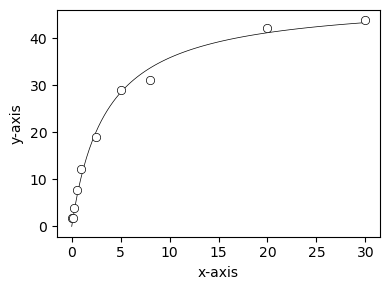

The Vmax is 48.375+/-1.523
The KM is 3.495+/-0.367
rsq = 0.993
4.84+/-0.15
(8.3+/-0.9)e+04


In [31]:
##########################################################
### Use the MM_Plot function to curve fit the data, get 
### Vmax and KM and plot the data and the fitted curve.
##########################################################

V_max, KM = BT.MM_Plot(conc, rate,                 ### Call MM_Plot function.
                        x_lim = (None,None),       ### Fill in the options
                        y_lim = (None,None),       ### to suit your needs.
                        title = "",
                        x_label = "x-axis",
                        y_label = "y-axis",
                        file_name = "Plot.pdf")    

##########################################################
### Print the Vmax and KM values. NOTE: They are Uncertainties
##########################################################

print(f"The Vmax is {V_max:0.3f}")
print(f"The KM is {KM:0.3f}")
rsq = r2_score(rate, BT.MM(conc, V_max.n, KM.n))
print(f"rsq = {rsq:0.3f}")
### TO DO: Calculate kcat - use units of micromolar per minute
### TO DO: Calculate kcat/KM - use units of per second

kcat = V_max/(E_conc/1E6)/1E6
print(kcat)
print(kcat/(KM/1000)*60)

## Lineweaver Burke Plot

the code block below will use the `Linear_Plot` function in *BiochemTools* 
to perform a line fit. The function will plot the data with the line fit and return the slope and intercept.

We can the use these values to calculate the $V_{max}$ and $K_M$ using the Lineweaver-Burke plot.

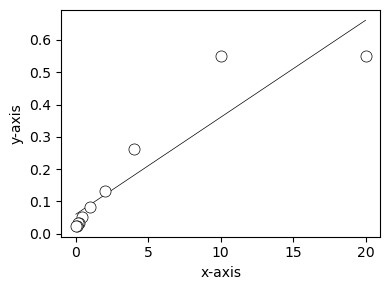

The slope is 0.030+/-0.004
The intercept is 0.061+/-0.032

The Vmax is 16.490+/-8.767
The KM is 0.495+/-0.273
rsq = -0.285


In [33]:
##########################################################
### Use the Linear_Plot function to curve fit the data, get 
### slope and intercept and plot the data and the line fit.
##########################################################

x = 1/conc
y = 1/rate

##########################################################
### Call Linear_Plot function. It will perform the linear fit
### and return a list of values (slope and intercept.)
### You may also change the labels of the plot, etc.
##########################################################

slope, intercept = BT.Linear_Plot(x, y,
                                  x_lim = (None,None),
                                  y_lim = (None,None),
                                  title ="",
                                  x_label = "x-axis",
                                  y_label = "y-axis",
                                  file_name = "Plot.pdf")        
print(f"The slope is {slope:0.3f}")
print(f"The intercept is {intercept:0.3f}")
print()

##########################################################
### Print the Vmax and KM values. NOTE: They are Uncertainties
##########################################################

V_max  = 1 / intercept        ### calculate MM parameters from slope and intercept
KM = V_max * slope           

print(f"The Vmax is {V_max:0.3f}")
print(f"The KM is {KM:0.3f}")
rsq = r2_score(rate, BT.Linear_Plot(x, slope.n, intercept.n))

print(f"rsq = {rsq:0.3f}")


## Eadie-Hofstee Plot

In [26]:
##########################################################
### Steal the code above and use it to obtain KM and Vmax 
### using the Eadie-Hofstee plot
##########################################################


## Hanes-Woolf Plot

In [27]:
##########################################################
### Steal the code above and use it to obtain KM and Vmax 
### using the Hanes-Woolf plot
##########################################################
